# Rainfall Weather Forecasting By Saurabh Lad

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 8425
No of Columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large,  Let check for any entry which is repeated or duplicated in dataset. </b>

In [5]:
df.duplicated().sum()

1663

<b> If we just check CSV File we can find that there are some missing value in dataset which shown fill with '?' 
    
Let check how many question mark (" ?") inside dataset.
</b>

In [6]:
df.isin([' ?']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<b> Let replace ' ?' with np.NaN </b>

In [7]:
df=df.replace(' ?',np.NaN)

<b> Let check if any whitespace, 'NA' or '-' exist in dataset. </b>

In [8]:
df.isin([' ','NA','-']).sum().any()

False

#### Comment:
1. We have Replace ' ?' with np.NaN
2. No whitespace, NA, '-' exist in dataset.

<b> Let drop duplicated entry from dataset before checking null values. </b>

In [9]:
df.drop_duplicates(keep='last', inplace=True)

In [10]:
df.shape

(6762, 23)

## Missing value check 

<AxesSubplot:>

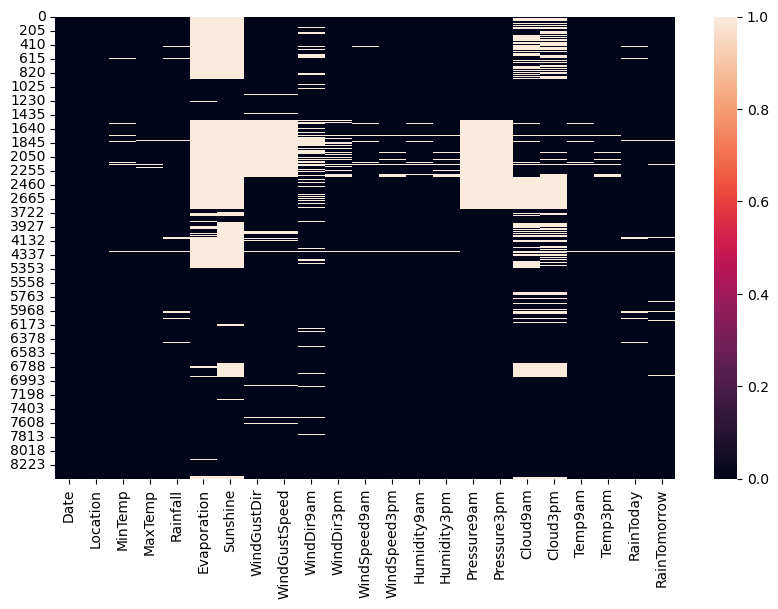

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3236       47.855664
Evaporation              2921       43.197279
Cloud3pm                 1902       28.127773
Cloud9am                 1866       27.595386
Pressure3pm              1311       19.387755
Pressure9am              1308       19.343390
WindGustDir               942       13.930790
WindGustSpeed             942       13.930790
WindDir9am                794       11.742088
WindDir3pm                294        4.347826
Rainfall                  138        2.040816
RainToday                 138        2.040816
RainTomorrow              138        2.040816
WindSpeed3pm              100        1.478852
Humidity3pm                96        1.419698
Temp3pm                    92        1.360544
MinTemp                    70        1.035197
WindSpeed9am               63        0.931677
MaxTemp                    57        0.842946
Humidity9am                54        0.798580
Temp9am                    51     

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm